In [ ]:
import os
os.mkdir('plants')


In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten,Dropout
from keras.layers import Dense


classifier = Sequential()

# Step 1 - Convolution
classifier.add(Conv2D(64, (3, 3), input_shape = (64, 64, 3), activation = 'relu'))

# Step 2 - Pooling
classifier.add(MaxPooling2D(pool_size = (2, 2)))

# Adding a second convolutional layer
classifier.add(Conv2D(128, (3, 3), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))
classifier.add(Conv2D(64,(3,3),activation='relu'))
classifier.add(Dropout(rate=0.1))
# Step 3 - Flattening
classifier.add(Flatten())

# Step 4 - Full connection
classifier.add(Dense(units = 128, activation = 'relu'))
classifier.add(Dense(units = 15, activation = 'softmax'))

classifier.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_directory('/content/plants/PlantVillage',
                                                 target_size = (64, 64),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

test_set = test_datagen.flow_from_directory('/content/plants/PlantVillage',
                                           target_size = (64, 64),
                                           batch_size = 32,
                                           class_mode = 'categorical')
batch_size=32
# checkpoint
from keras.callbacks import ModelCheckpoint
weightpath = "gdrive/My Drive/plant_weights_best.hdf5"
checkpoint = ModelCheckpoint(weightpath, monitor='val_acc', verbose=1, save_best_only=True, save_weights_only=True, mode='max')
callbacks_list = [checkpoint]



classifier.fit_generator(training_set,steps_per_epoch = 20638//batch_size, epochs = 5, validation_data = test_set, validation_steps = 20638//batch_size)

classifier.save_weights("/content/drive/My Drive/plant_disease_trained_model.h5")
a=training_set.class_indices.keys()
a=list(a)





Found 20638 images belonging to 15 classes.
Found 20638 images belonging to 15 classes.
Epoch 1/5
644/644 [==============================] - 389s 604ms/step - loss: 1.3960 - accuracy: 0.5501 - val_loss: 0.8527 - val_accuracy: 0.7190
Epoch 2/5
644/644 [==============================] - 389s 604ms/step - loss: 0.7108 - accuracy: 0.7581 - val_loss: 0.6083 - val_accuracy: 0.7965
Epoch 3/5
644/644 [==============================] - 387s 601ms/step - loss: 0.5322 - accuracy: 0.8181 - val_loss: 0.5714 - val_accuracy: 0.8117
Epoch 4/5
644/644 [==============================] - 388s 602ms/step - loss: 0.4457 - accuracy: 0.8476 - val_loss: 0.5440 - val_accuracy: 0.8168
Epoch 5/5
644/644 [==============================] - 390s 605ms/step - loss: 0.3963 - accuracy: 0.8643 - val_loss: 0.3045 - val_accuracy: 0.8920


Populating the interactive namespace from numpy and matplotlib


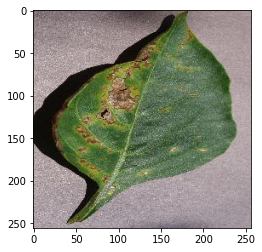

[1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [ ]:
import tensorflow as tf
import keras

%pylab inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
img=mpimg.imread('/content/plants/plantvillage/PlantVillage/Pepper__bell___Bacterial_spot/0022d6b7-d47c-4ee2-ae9a-392a53f48647___JR_B.Spot 8964.JPG')
imgplot = plt.imshow(img)
plt.show()
img = keras.preprocessing.image.load_img(
    "/content/plants/plantvillage/PlantVillage/Pepper__bell___Bacterial_spot/0022d6b7-d47c-4ee2-ae9a-392a53f48647___JR_B.Spot 8964.JPG", target_size=(64, 64, 3))
img_array = keras.preprocessing.image.img_to_array(img)

img_array = tf.expand_dims(img_array, 0)  

predictions = classifier.predict(img_array)
score = predictions[0]
print(score)